<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [22]:
# Import Required Libariries
import pandas as pd
import numpy as np

# Plotting
# import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
from collections import Counter
import re
import requests
import spacy
from spacy.tokenizer import Tokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from bs4 import BeautifulSoup


In [2]:
nlp = spacy.load("en_core_web_lg")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
#  To better see column contents
pd.set_option('display.max_colwidth', 450)

In [4]:

job_listings = r'C:\Users\whats\DS_Unit_4\DS-Unit-4-Sprint-1-NLP\module2-vector-representations\data\job_listings.csv'
jobs_df = pd.read_csv(job_listings)

print(jobs_df.shape)
print(jobs_df.columns)
jobs_df.head(3)


(426, 3)
Index(['Unnamed: 0', 'description', 'title'], dtype='object')


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</...",Data scientist
1,1,"b'<div>Job Description<br/>\n<br/>\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.</p><p><b>\nA day in the life\xe2\x80\xa6</b></p><ul><li>\nWork with a small agile team to design and develop mobile applications in an i...",Data Scientist I
2,2,"b'<div><p>As a Data Scientist you will be working on consulting side of our business. You will be responsible for analyzing large, complex datasets and identify meaningful patterns that lead to actionable recommendations. You will be performing thorough testing and validation of models, and support various aspects of the business with data analytics.</p><ul><li>\nAbility to do statistical modeling, build predictive models and leverage machine...",Data Scientist - Entry Level


In [5]:
jobs_df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [6]:
df= jobs_df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())

# Remove hard returns and other punctuation
df['description'] = df['description'].replace({r'\\x..':'', r'\\n':' '}, regex=True)
df.head(2)

,description,title
0,"b""Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pan...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.\nA day in the life\xe2\x80\xa6\nWork with a small agile team to design and develop mobile applications in an iterative fashion.\nWork with a tight-knit gr...",Data Scientist I


In [8]:
df['title'].value_counts()

Data Scientist                                   150
Senior Data Scientist                             14
Junior Data Scientist                             10
Associate Data Scientist                           8
Data Scientist Intern                              7
                                                ... 
Data Scientist Summer Internship                   1
Data Scientist - AVP                               1
Data Analyst/Jr. Data Scientist                    1
Advisor: CCO Audience Strategy - Data Science      1
Data Scientist | Shared Rides                      1
Name: title, Length: 177, dtype: int64

In [9]:
# How many specific words appear in the titles other than Data Scienc(e/tist)?
df['title'] = df['title'].str.replace('Scientist', '')
df['title'] = df['title'].str.replace('Science', '')
df['title'] = df['title'].str.replace('Data', '')
df['title'].value_counts()

                             150
Senior                        14
Junior                        10
  Intern                       9
Associate                      8
                            ... 
Statistical                    1
  (Subject Matter Expert)      1
  - Styling Algorithms         1
Senior   Engineer              1
  - Machine Learning           1
Name: title, Length: 176, dtype: int64

## 2) Use Spacy to tokenize the listings 

In [10]:
# Inialize spaCy model and tokenizer
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

In [11]:
# SpaCy Tokenizer pipeline

tokens = []

# select only letters to ignore punctuation & numbers
# remove stop words, automatic lower case
for doc in tokenizer.pipe(jobs_df['description'], batch_size=500):

    doc_tokens = []

    for token in doc:
        if (token.is_alpha == True) and (token.is_stop != True):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['SpaCy_tokens'] = tokens
df['SpaCy_tokens'].head(2)

0                                                                                   [understanding, machine, learning, models, like, logistic, random, decision, experience, expert, level, coding, skills, write, clean, efficient, data, manipulation, mandatory, packages, like, matplotlib, etc, python, tidyr, communicate, model, findings, technical, stake, experience, similar, programming, past, work, kaggle, published, degree, science, quant, specific]
1    [data, scientist, help, build, machine, learning, data, help, clients, navigate, healthcare, empowering, improving, generation, accolade, applications, user, day, small, agile, team, design, develop, mobile, applications, iterative, group, development, team, members, best, practices, help, guide, future, effectively, collaborative, member, development, effectively, individual, quick, turnaround, enhancements, meeting, expectations, deliverabl...
Name: SpaCy_tokens, dtype: object

In [12]:
# function taken directly from lecture notebook

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [13]:
spacy_counts = count(df['SpaCy_tokens'])
print(spacy_counts.shape)
spacy_counts

(6316, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,data,419,3748,1.0,0.042560,0.042560,0.983568
142,business,303,1008,2.0,0.011446,0.054007,0.711268
37,experience,357,940,3.0,0.010674,0.064681,0.838028
0,work,326,875,4.0,0.009936,0.074617,0.765258
132,team,314,726,5.0,0.008244,0.082861,0.737089
...,...,...,...,...,...,...,...
6304,obligated,1,1,6312.0,0.000011,0.999955,0.002347
6310,comply,1,1,6313.0,0.000011,0.999966,0.002347
6303,immunization,1,1,6314.0,0.000011,0.999977,0.002347
6312,flu,1,1,6315.0,0.000011,0.999989,0.002347


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [15]:
data = df['description']
print(len(data))

426


In [16]:
# Initialize vectorizer
vect = CountVectorizer(lowercase=True,
                        stop_words='english', # standard sklearn
                        min_df=4, # token must be in a minimum number of documents
                        max_df=.25, # token can appear in max% (or number) of documents,
                        ngram_range=(1,1) # single words as tokens
                        )

# build vocab
vect.fit(data)

# transform text; dtm: Document Term Matrix
dtm1 = vect.transform(data)

dtm = pd.DataFrame(dtm1.todense(), columns=vect.get_feature_names())

print(dtm.shape)
dtm.head(2)

(426, 3089)


,000,04,10,100,11,12,15,17,18,19,...,write,writing,www,xgboost,year,yes,york,youll,youre,youve
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


## 4) Visualize the most common word counts

In [17]:
dtm.sum().sort_values(ascending=False)

digital         205
model           183
intelligence    167
global          162
growth          162
               ... 
dress             4
dreams            4
secondary         4
munging           4
devoted           4
Length: 3089, dtype: int64

In [47]:
top_words = dtm.sum().sort_values(ascending=False)
words_df = pd.DataFrame(top_words, columns = ['count'])
words_df.head(15)

,count
digital,205
model,183
intelligence,167
global,162
growth,162
optimization,159
project,154
clients,154
cross,149
visualization,148


In [53]:
words_df_10 = words_df[:10]

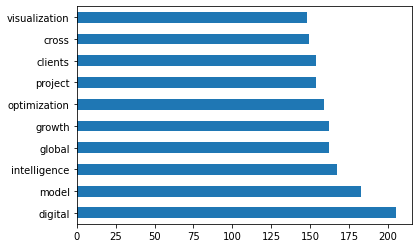

In [55]:
words_df_10['count'].plot(kind='barh');

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [56]:
def tokenize(document):
    
    doc = nlp(document) #nlp is spacy large librarry
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [57]:
# Initialize vector
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words = 'english',
                        min_df=4,
                        max_df=.25,
                        ngram_range=(1,2),
                        tokenizer=tokenize
                        )


dtm = tfidf.fit_transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

print(dtm.shape)
dtm.head()

(426, 7854)


,,1,2,3,4,5,6,ability,addition,additional,...,year work,yes,york,york city,york office,you\'ll,you\'ll,you\'ll work,you\'re,|
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [58]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [59]:
# inspect the corpus of documents for the 5 most similiar documemnts (includes itself)
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.30903955, 1.31985436, 1.32737651, 1.34460762]]),
 array([[  0, 115, 338, 274, 168]], dtype=int64))

In [64]:
my_ad = ["""Seeking a data scientist to join our mostly remote team. Willing to train the right candidate. Experience with python, SQL, machine learning, natural language processing, data analysis. Strong grasp of statics and mathematics."""]

In [65]:
my_vector = tfidf.transform(my_ad)
my_vector

<1x7854 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [66]:
nn.kneighbors(my_vector.todense())

(array([[1.33753052, 1.33964153, 1.33964153, 1.3426874 , 1.3564011 ]]),
 array([[256, 123,  23, 162, 356]], dtype=int64))

In [68]:
data[162]

"b'The Team: The Data science team is a newly formed applied research team within S&P Global Ratings that will be responsible for building and executing a bold vision around using Machine Learning, Natural Language Processing, Data Science, knowledge engineering, and human computer interfaces for augmenting various business processes. The Impact: This role will have a significant impact on the success of our data science projects ranging from choosing which projects should be undertaken, to delivering highest quality solution, ultimately enabling our business processes and products with AI and Data Science solutions. Whats in it for you: This is a high visibility team with an opportunity to make a very meaningful impact on the future direction of the company. You will work with senior leaders in the organization to help define, build, and transform our business. You will work closely with other senior scientists to create state of the art Augmented Intelligence, Data Science and Machin

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 